In [1]:
from utils import *
from sklearn.datasets import fetch_kddcup99
import pandas as pd

<Figure size 2400x1800 with 0 Axes>

In [2]:
ds = fetch_kddcup99(as_frame=True)
df = pd.concat([ds.data, ds.target], axis=1)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [3]:
# shuffle so that we have a more realistic realtime dataset.
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print("number of items in the DS")
len(df)

number of items in the DS


494021

In [8]:
def print_all_cols_compare():
    for col_name in df.columns:
        if type(df[col_name][0]) not in [float, int]:
            continue
        print(f'running the 3 methods on {col_name}')
        reference_data = df[col_name].head(50000).tolist()
        test_data = df[col_name].tail(50000).tolist()

        print(f'original ks_score: {get_original_ks(reference_data, test_data)}')
        print(f'Bins KS score: {get_bins_ks(reference_data, test_data)}')
        print(f'Digest KS score: {get_digest_ks(reference_data, test_data)}')

        print("----------------------------------------------------")

In [4]:
reference_data = df['src_bytes'].head(50000).tolist()
test_data_all = df['src_bytes'][50000:].tolist()

# decide on chunk size
chunk_size = 50000

ground_truth_vals = []
bins_vals = []
digest_vals = []
for i in range(0, len(test_data_all), chunk_size):
    test_data = test_data_all[i:i + chunk_size]
    original_ks = get_original_ks(reference_data, test_data)
    ground_truth_vals.append(original_ks)
    print(f'original ks_score: {original_ks}')
    bins_val = get_bins_ks(reference_data, test_data)
    bins_vals.append(bins_val)
    print(f'Bins KS score: {bins_val}')
    dig_val = get_digest_ks(reference_data, test_data)
    digest_vals.append(dig_val)
    print(f'Digest KS score: {dig_val}')

    print("----------------------------------------------------")

original ks_score: 0.45216
Bins KS score: 6e-05
reference_digest.batch_update(ref_data) took:0.8008632659912109 seconds to run.
test_digest.batch_update(ref_data) took:0.5274848937988281 seconds to run.
checking the loop took:28.318007230758667 seconds to run.
Digest KS score: 0.45261857335127853
----------------------------------------------------
original ks_score: 0.49708
Bins KS score: 0.00116
reference_digest.batch_update(ref_data) took:0.6429011821746826 seconds to run.
test_digest.batch_update(ref_data) took:0.46146416664123535 seconds to run.
checking the loop took:38.0392165184021 seconds to run.
Digest KS score: 0.49632959771957963
----------------------------------------------------
original ks_score: 0.7229
Bins KS score: 0.00014
reference_digest.batch_update(ref_data) took:0.5900554656982422 seconds to run.
test_digest.batch_update(ref_data) took:0.15361666679382324 seconds to run.
checking the loop took:17.12162184715271 seconds to run.
Digest KS score: 0.8132628571428568

C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\final_experiments\utils.py:10: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 50000 and 44021. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:0.6801433563232422 seconds to run.
test_digest.batch_update(ref_data) took:0.38240575790405273 seconds to run.
checking the loop took:28.066853523254395 seconds to run.
Digest KS score: 0.6411503660800019
----------------------------------------------------


In [24]:
print(ground_truth_vals)
print(bins_vals)
print(digest_vals)

[0.45216, 0.49708, 0.7229, 0.7229, 0.7229, 0.59802, 0.87088, 0.69458, 0.6416049685377433]
[6e-05, 0.00116, 0.00014, 0.00014, 0.00014, 8e-05, 0.00012, 0.00014, 4.913427682229667e-05]
[0.45261857335127853, 0.49632959771957963, 0.8132628571428568, 0.7233, 0.8198558140549977, 0.5984373913043479, 0.870923216374269, 0.6713482129100541, 0.6411503660800019]


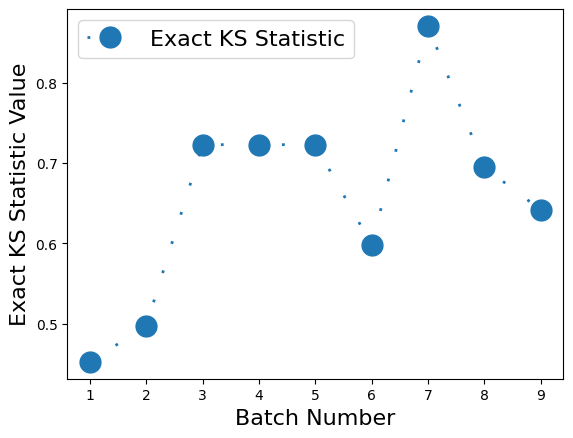

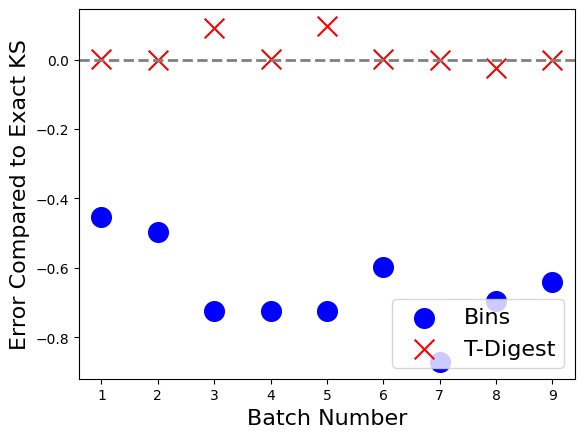

In [6]:
plot_exact_KS2(ground_truth_vals, "networking_traffic_exact_ks")
plot_errors_lines2(ground_truth_vals, bins_vals, digest_vals, "networking_traffic_errors_bins_vs_digest")

# plot_errors_lines(ground_truth_vals, bins_vals, digest_vals)

# very bad Bins results, let's examine why...

## let's plot the distribution of the first 3 chunks (including the reference - first 50k)

### first let's print the reference data distribution:

In [23]:
print(max(reference_data))

693375640


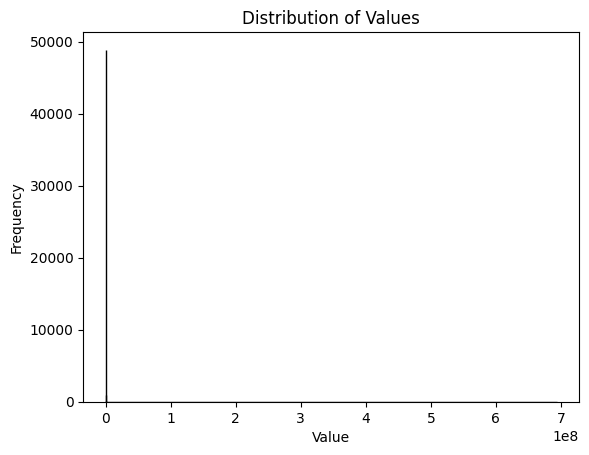

In [27]:

# Plotting the histogram
plt.hist(reference_data, bins=50000, edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(reference_data, bins=693375640, edgecolor='black')  # Adjust the number of bins for more or less granularity
plt.title('Distribution of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000281ED651620> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000281ED65F420> (for post_execute):



KeyboardInterrupt



In [12]:

def get_err_array(list1, list2):
    if len(list1) != len(list2):
        raise Exception("bad arg")

    return [abs(a - b) for a, b in zip(list1, list2)]


bins_err = get_err_array(ground_truth_vals, bins_vals)
dig_err = get_err_array(ground_truth_vals, digest_vals)

print(f'bins err:{bins_err}')
print(f'digest err:{dig_err}')

bins err:[0.0042314285714285926, 0.0008685714285713868, 0.0030171428571429404, 0.0019628571428571013, 0.0018771428571428364, 0.0015971428571428155, 0.0038142857142856933, 0.0019714285714286547, 0.0024571428571428574, 0.0003628571428570806, 0.0024342857142856935, 0.001591428571428613, 0.0015393155988509288]
digest err:[0.0009723350548814895, 3.862399061025463e-05, 0.0002640586660635474, 0.0002459625620259368, 0.00010827537308668233, 4.116456578491783e-05, 0.0003442857142856269, 0.0007299999999999425, 0.0002918838188885487, 0.0009452590382543467, 0.00010126555582971918, 0.00044571826697789845, 0.0002496095093766147]


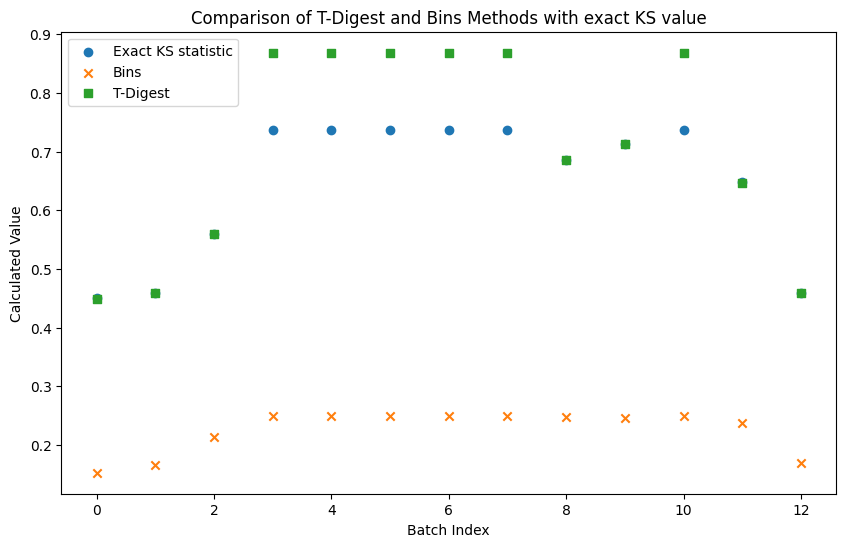

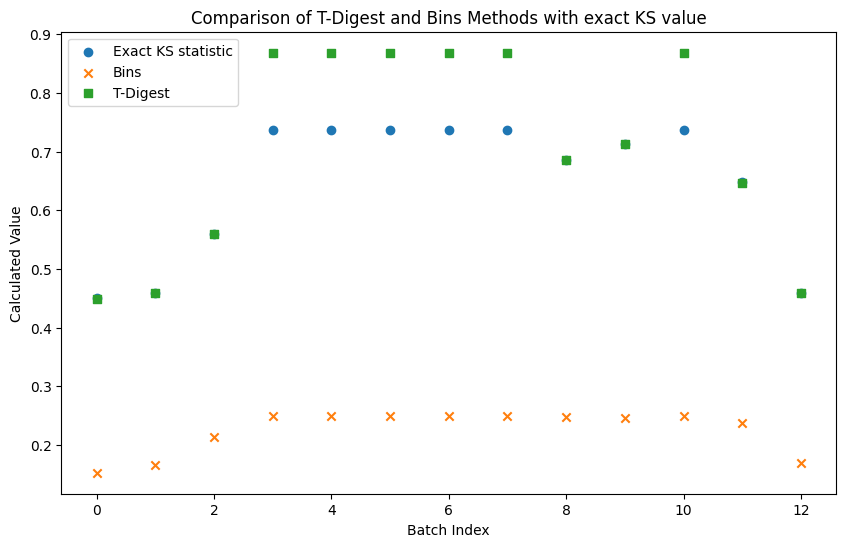

In [11]:
plot_3_methods(ground_truth_vals, bins_vals, digest_vals)